### 1. Importing libraries & loading image

In [1]:
!pip3 install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=57b6a21a2e656665f3d45c2c8f18c9bd712e1e1d4b5a009c1a40500e8805c5b0
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import cv2
import numpy as np
import face_recognition
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [3]:
# Anne Hathaway:    https://media.vogue.fr/photos/62b591fa8a4275dbe4097b25/2:3/w_2560%2Cc_limit/1240769828

# Anne Hathaway Test Photo : https://www.tasteofcinema.com/wp-content/uploads/2017/02/Anne-Hathaway-Les-Miserables.jpg

# Emma Watson: https://images.hellomagazine.com/horizon/landscape/6e68a62f634c-emmawatson-t.jpg

In [4]:
# Load the image from the web
response = requests.get('https://media.vogue.fr/photos/62b591fa8a4275dbe4097b25/2:3/w_2560%2Cc_limit/1240769828')
imgAnne = Image.open(BytesIO(response.content))

In [5]:
# Convert the image to a format suitable for face_recognition and OpenCV
imgAnne = np.array(imgAnne)
imgAnne = cv2.cvtColor(imgAnne, cv2.COLOR_RGB2BGR)

# Convert color back to RGB for displaying
imgAnne_rgb = cv2.cvtColor(imgAnne, cv2.COLOR_BGR2RGB)

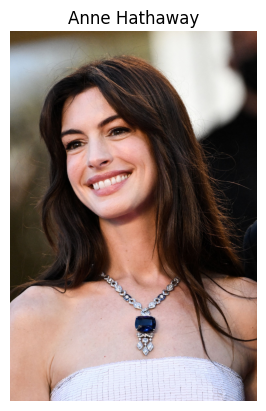

In [6]:
# Use matplotlib to display the image
plt.imshow(imgAnne_rgb)
plt.title('Anne Hathaway')
plt.axis('off')
plt.show()

In [7]:
# Find location of face and create unique encoding
faceLoc = face_recognition.face_locations(imgAnne)[0]
encodeAnne = face_recognition.face_encodings(imgAnne)[0]
print(faceLoc)

(741, 1508, 1891, 357)


In [8]:
# Find all face locations in the image
face_locations = face_recognition.face_locations(imgAnne)

# Draw rectangles around each face
for faceLoc in face_locations:
    top, right, bottom, left = faceLoc
    cv2.rectangle(imgAnne, (left, top), (right, bottom), (0, 255, 0), 20)

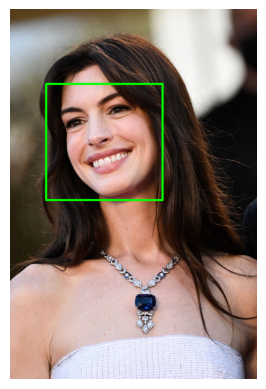

In [9]:
# Convert the image color back to RGB (OpenCV uses BGR)
imgAnne_display = cv2.cvtColor(imgAnne, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.imshow(imgAnne_display)
plt.axis('off')
plt.show()

### 2. Loading test image & plotting it

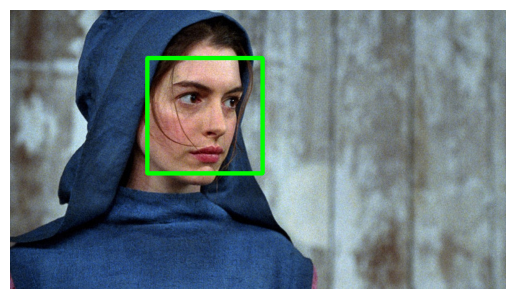

In [10]:
# Load the image from the web
response = requests.get('https://www.tasteofcinema.com/wp-content/uploads/2017/02/Anne-Hathaway-Les-Miserables.jpg')
imgTest = Image.open(BytesIO(response.content))

# Test images
imgTest = np.array(imgTest)
imgTest = cv2.cvtColor(imgTest, cv2.COLOR_RGB2BGR)

faceLocTest = face_recognition.face_locations(imgTest)[0]
encodeTest = face_recognition.face_encodings(imgTest)[0]

# Find all face locations in the image
face_locations_test = face_recognition.face_locations(imgTest)

# Draw rectangles around each face
for faceLocTest in face_locations_test:
    top, right, bottom, left = faceLocTest
    cv2.rectangle(imgTest, (left, top), (right, bottom), (0, 255, 0), 5)

# Convert the image color back to RGB (OpenCV uses BGR)
imgTest_display = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.imshow(imgTest_display)
plt.axis('off')
plt.show()

### 3. Comparing faces & measuring how similar they are

In [11]:
results = face_recognition.compare_faces([encodeAnne],encodeTest)
print(results)

[True]


In [12]:
faceDis = face_recognition.face_distance([encodeAnne],encodeTest)
print(faceDis)

[0.43838728]


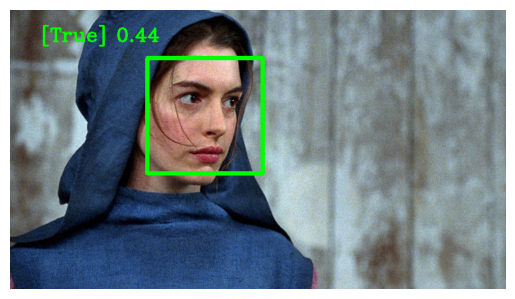

In [13]:
# Add text to the image
cv2.putText(imgTest, f'{results} {round(faceDis[0], 2)}', (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

# Convert the image color back to RGB (OpenCV uses BGR)
imgTest_RGB = cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.imshow(imgTest_RGB)
plt.axis('off')
plt.show()
